In [2]:
import pandas as pd

# Load the red and white wine datasets into separate data frames
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Combine the red and white wine data frames into a single data frame
wines = pd.concat([red_wine, white_wine], ignore_index=True)

# Inspect the resulting data frame
print(wines.head())
print(wines.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the combined wine data frame
wines = pd.concat([pd.read_csv('winequality-red.csv', delimiter=';'), 
                   pd.read_csv('winequality-white.csv', delimiter=';')], 
                  ignore_index=True)

# Define the features and target variable
X = wines[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wines['quality']

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train data into train and validation sets (60/20/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shape of each set
print(f'Train set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')

Train set shape: (3897, 10)
Validation set shape: (1300, 10)
Test set shape: (1300, 10)


In [4]:
import pandas as pd
import numpy as np

# Load the combined wine data frame
wines = pd.concat([pd.read_csv('winequality-red.csv', delimiter=';'), 
                   pd.read_csv('winequality-white.csv', delimiter=';')], 
                  ignore_index=True)

# Calculate the correlation matrix between all variables
corr_matrix = wines[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
                     'sulphates', 'alcohol', 'quality']].corr()

# Print the correlation matrix as a table
print(corr_matrix.to_string())

                      volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   alcohol   quality
volatile acidity              1.000000    -0.377981       -0.196011   0.377124            -0.352557             -0.414476  0.271296  0.261454   0.225984 -0.037640 -0.265699
citric acid                  -0.377981     1.000000        0.142451   0.038998             0.133126              0.195242  0.096154 -0.329808   0.056197 -0.010493  0.085532
residual sugar               -0.196011     0.142451        1.000000  -0.128940             0.402871              0.495482  0.552517 -0.267320  -0.185927 -0.359415 -0.036980
chlorides                     0.377124     0.038998       -0.128940   1.000000            -0.195045             -0.279630  0.362615  0.044708   0.395593 -0.256916 -0.200666
free sulfur dioxide          -0.352557     0.133126        0.402871  -0.195045             1.000000              0.720934  0.025717 -0.

density vs citric acid: correlation = 0.10
quality vs citric acid: correlation = 0.09
pH vs citric acid: correlation = -0.33
volatile acidity vs citric acid: correlation = -0.38
density vs residual sugar: correlation = 0.55
quality vs residual sugar: correlation = -0.04
pH vs residual sugar: correlation = -0.27
volatile acidity vs residual sugar: correlation = -0.20
density vs chlorides: correlation = 0.36
quality vs chlorides: correlation = -0.20
pH vs chlorides: correlation = 0.04
volatile acidity vs chlorides: correlation = 0.38
density vs free sulfur dioxide: correlation = 0.03
quality vs free sulfur dioxide: correlation = 0.06
pH vs free sulfur dioxide: correlation = -0.15
volatile acidity vs free sulfur dioxide: correlation = -0.35
density vs total sulfur dioxide: correlation = 0.03
quality vs total sulfur dioxide: correlation = -0.04
pH vs total sulfur dioxide: correlation = -0.24
volatile acidity vs total sulfur dioxide: correlation = -0.41


C:\Users\clara\anaconda3\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


density vs sulphates: correlation = 0.26
quality vs sulphates: correlation = 0.04
pH vs sulphates: correlation = 0.19
volatile acidity vs sulphates: correlation = 0.23
density vs alcohol: correlation = -0.69
quality vs alcohol: correlation = 0.44
pH vs alcohol: correlation = 0.12
volatile acidity vs alcohol: correlation = -0.04


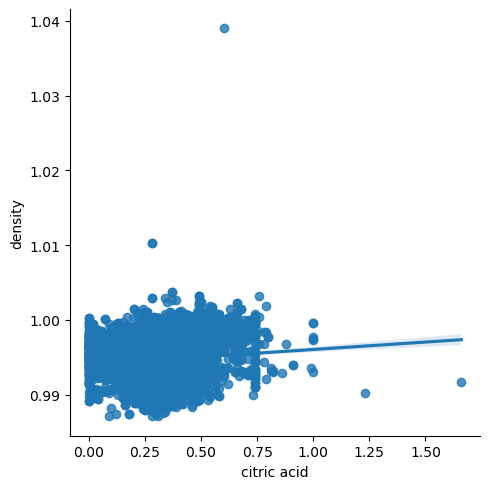

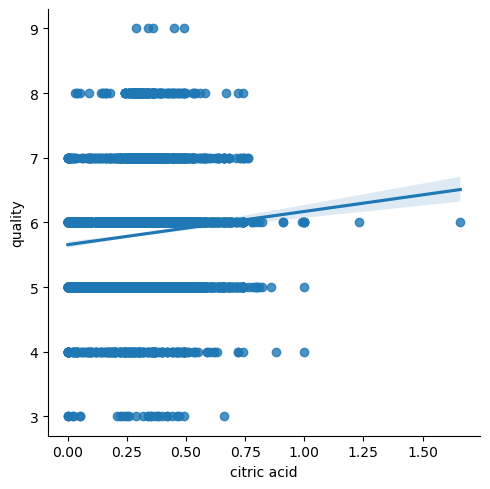

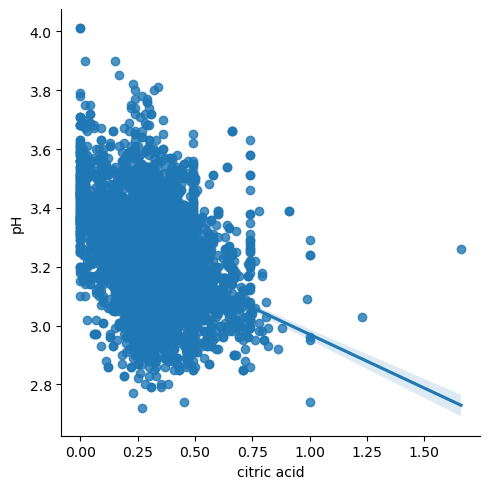

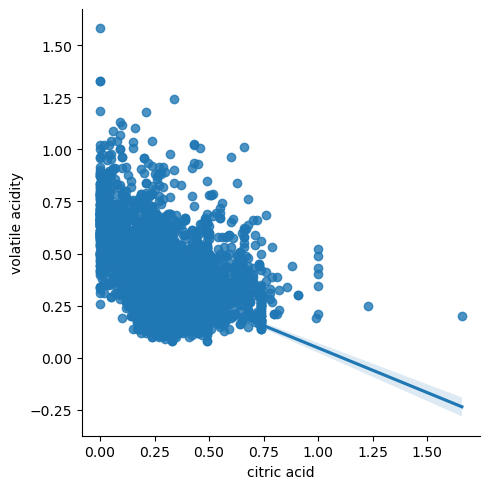

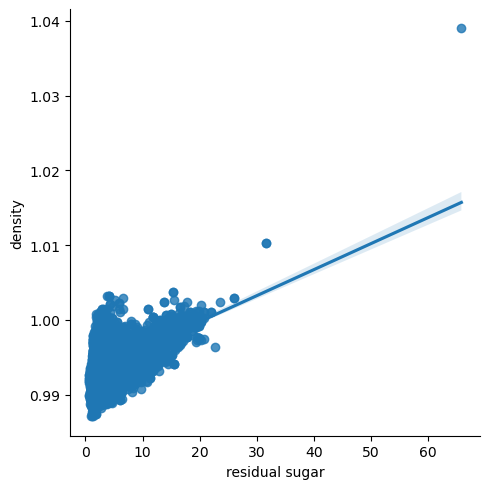

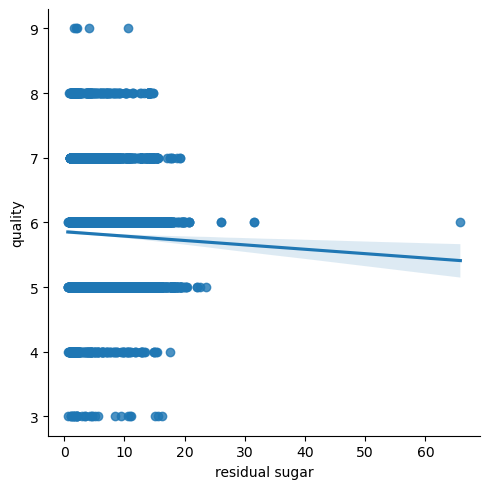

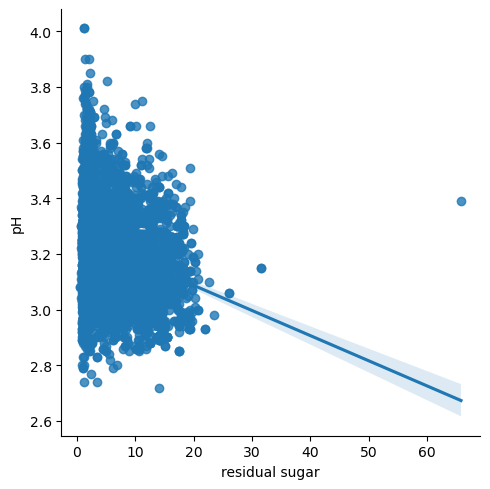

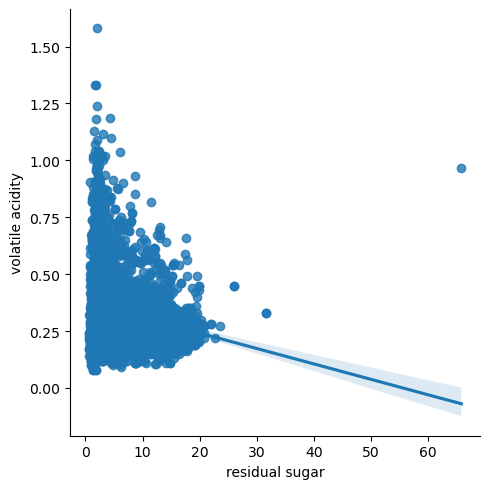

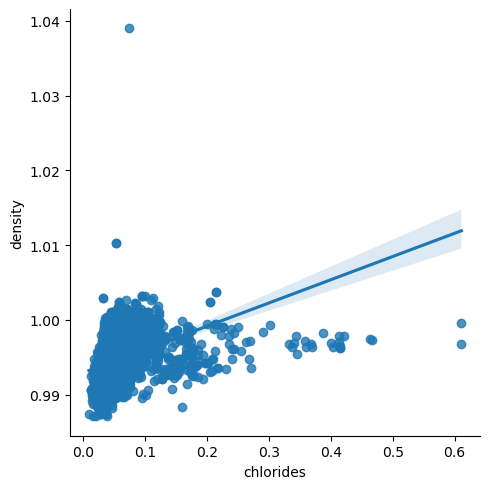

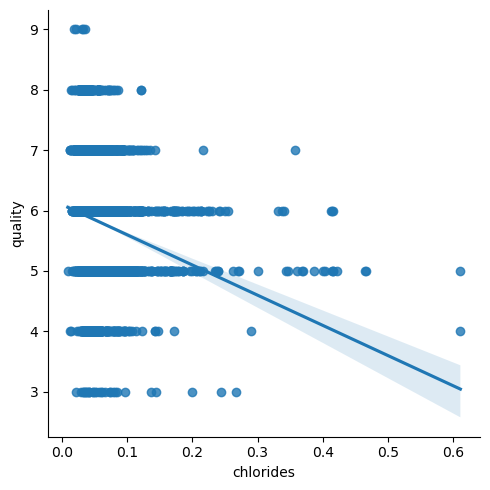

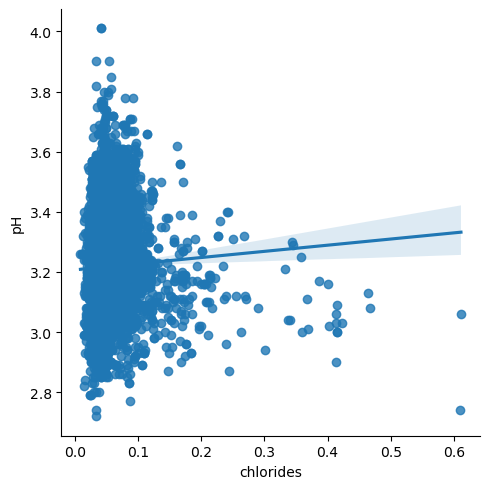

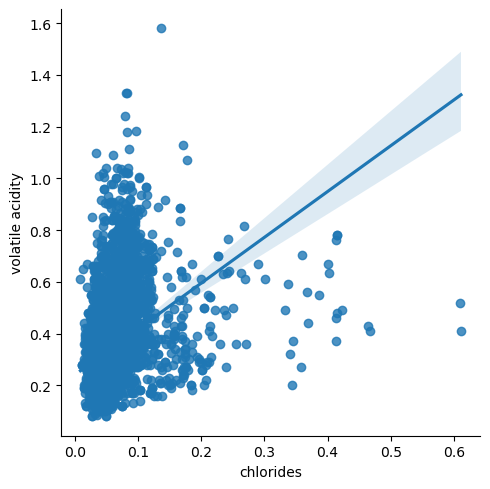

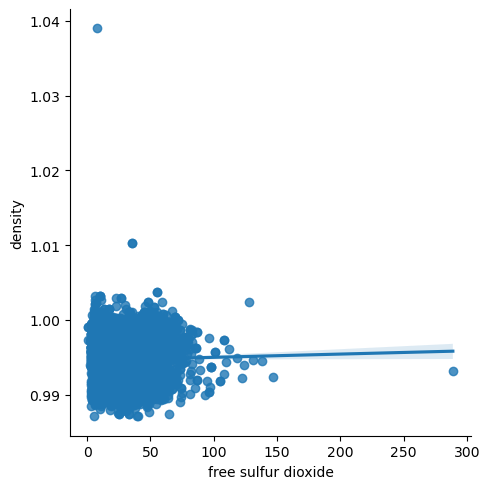

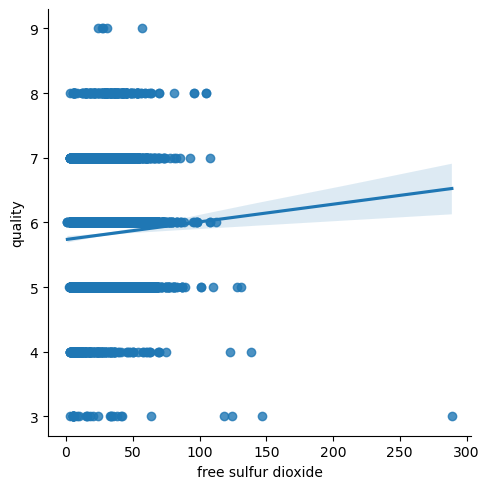

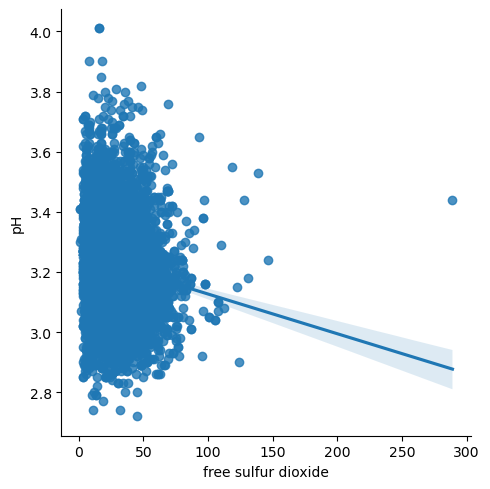

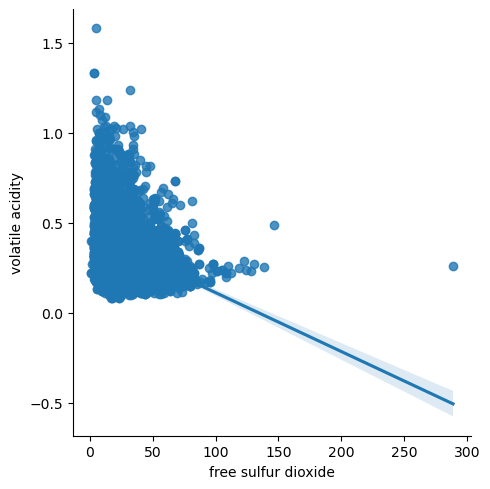

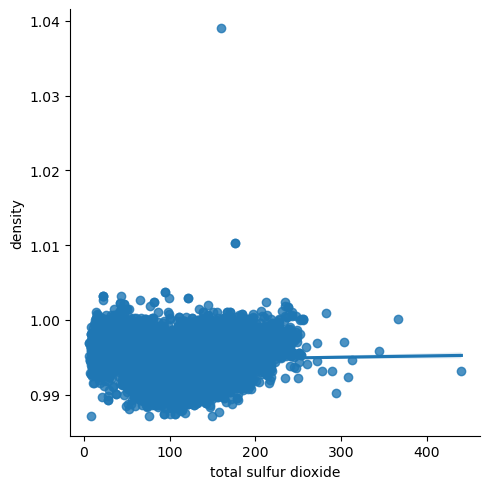

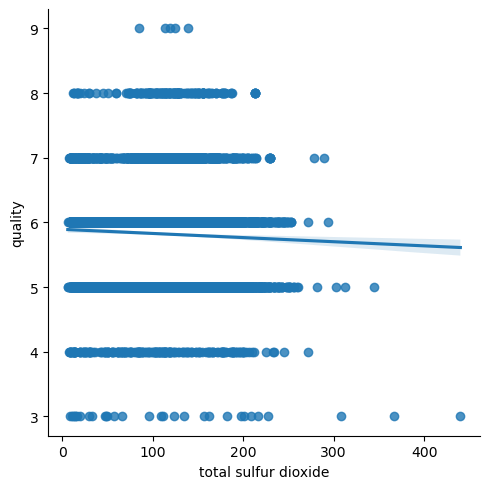

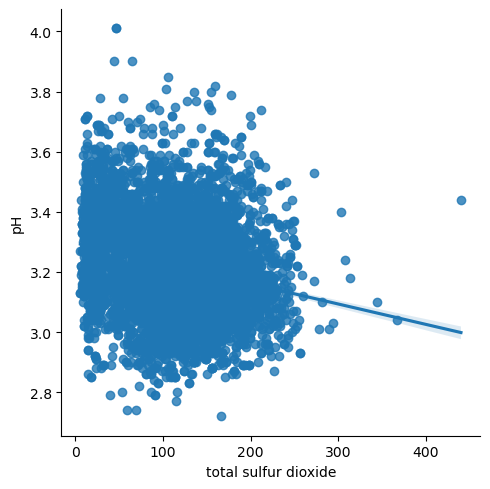

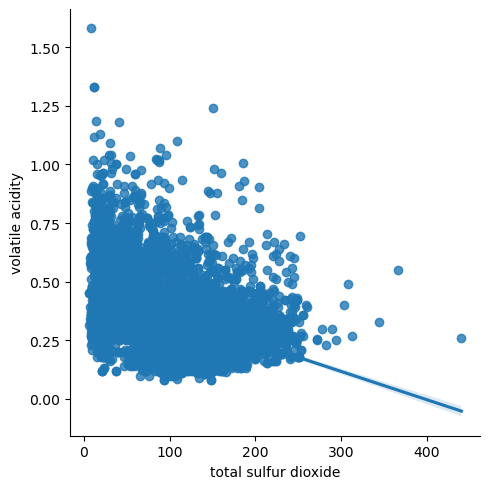

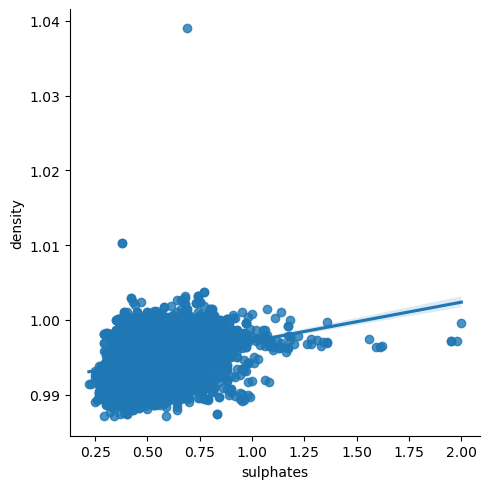

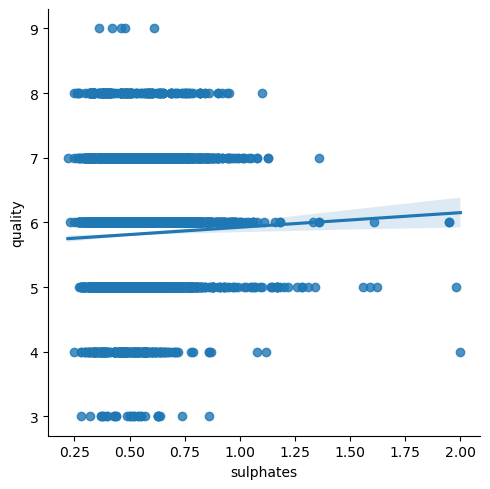

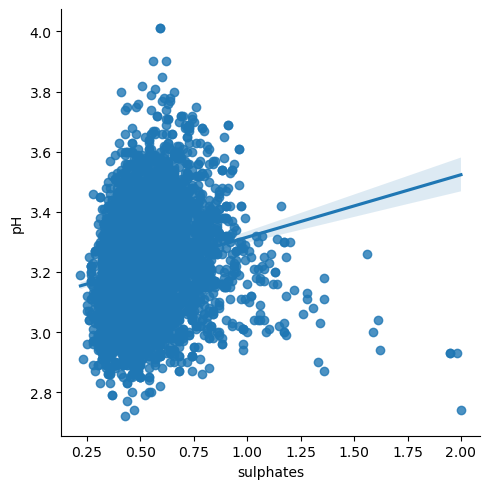

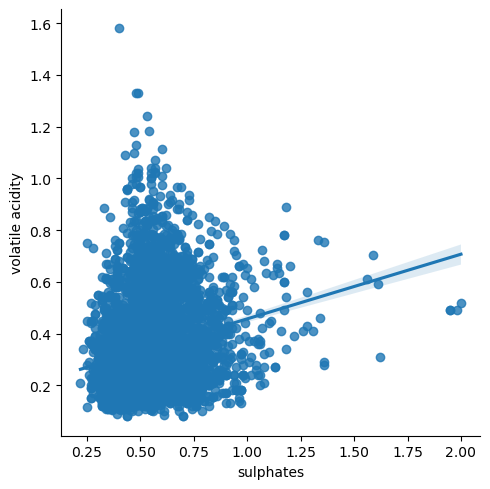

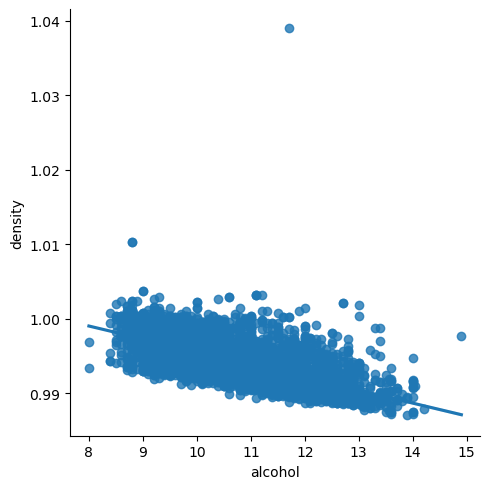

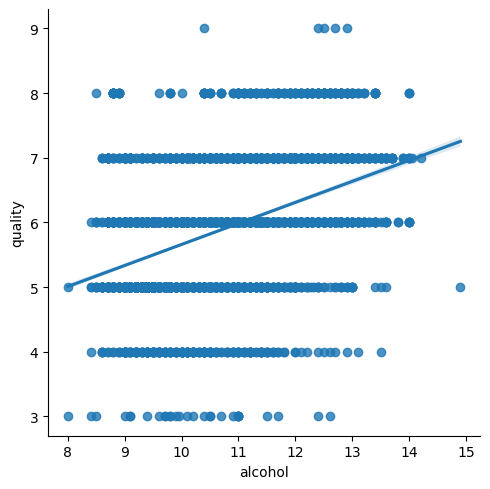

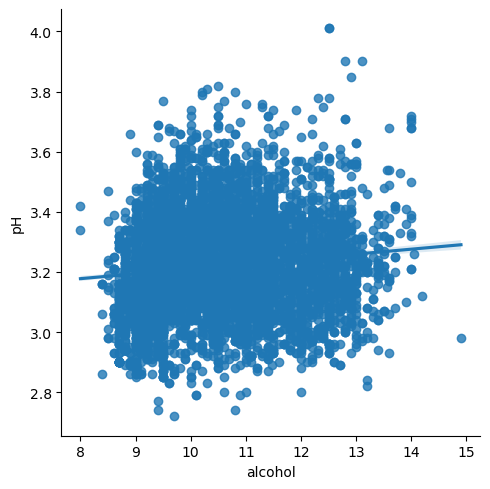

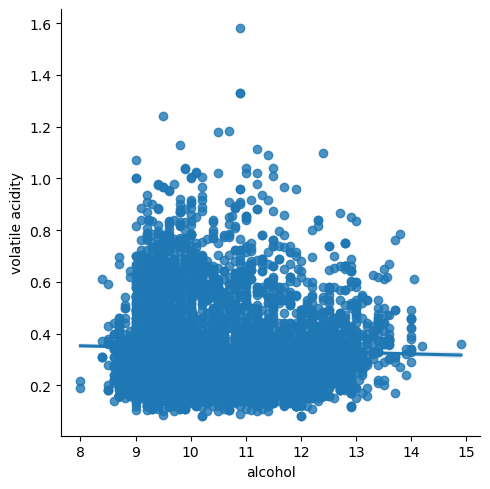

In [5]:
import pandas as pd
import seaborn as sns

# Load the combined wine data frame
wines = pd.concat([pd.read_csv('winequality-red.csv', delimiter=';'), 
                   pd.read_csv('winequality-white.csv', delimiter=';')], 
                  ignore_index=True)

# Define the independent and dependent variables
independents = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                'total sulfur dioxide', 'sulphates', 'alcohol']
dependents = ['density', 'quality', 'pH', 'volatile acidity']

# Loop through each independent variable and plot the relationship with each dependent variable
for independent in independents:
    for dependent in dependents:
        # Plot the scatter plot and regression line
        sns.lmplot(x=independent, y=dependent, data=wines)
        # Calculate the correlation coefficient
        corr = wines[independent].corr(wines[dependent])
        # Print the variable names and correlation coefficient
        print(f"{dependent} vs {independent}: correlation = {corr:.2f}")


In [9]:
import pandas as pd

# Load wine data
df = pd.read_csv('winequality-red.csv', sep=';')

# Select variables
dependent_vars = ['density', 'quality', 'pH', 'volatile acidity']
independent_vars = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Create an empty dictionary to store the correlation coefficients
corr_dict = {}

# Loop through variables to calculate correlation coefficients
for dep_var in dependent_vars:
    for ind_var in independent_vars:
        corr_coef = df[[dep_var, ind_var]].corr().iloc[0,1]
        corr_dict[(dep_var, ind_var)] = corr_coef

# Get the five independent variables with the highest correlation coefficients
linear_vars = sorted(corr_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

# Print all linearity coefficients in order from highest to lowest
print('All linearity coefficients in order from highest to lowest:')
for var, corr_coef in sorted(corr_dict.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f'{var[0]} and {var[1]}: {corr_coef}')

# Print the five independent variables with the highest correlation coefficients
print('\nThe following five independent variables exhibit the highest linearity coefficients:')
for var in linear_vars:
    print(f'{var[0][0]} and {var[0][1]}: {var[1]}')

All linearity coefficients in order from highest to lowest:
volatile acidity and citric acid: -0.5524956845595799
pH and citric acid: -0.5419041447395107
density and alcohol: -0.4961797702417342
quality and alcohol: 0.4761663240011364
density and citric acid: 0.36494717521123415
density and residual sugar: 0.35528337098334967
pH and chlorides: -0.2650261311732269
volatile acidity and sulphates: -0.26098668528328917
quality and sulphates: 0.25139707906925995
quality and citric acid: 0.22637251431804048
pH and alcohol: 0.2056325085054961
volatile acidity and alcohol: -0.20228802715325636
density and chlorides: 0.2006323266415197
pH and sulphates: -0.19664760230436984
quality and total sulfur dioxide: -0.18510028892653774
density and sulphates: 0.1485064117207901
quality and chlorides: -0.12890655993005293
pH and residual sugar: -0.0856524222188719
volatile acidity and total sulfur dioxide: 0.07647000482092811
density and total sulfur dioxide: 0.07126947620312776
pH and free sulfur dioxid

In [15]:
import pandas as pd

# Load wine data
df = pd.read_csv('winequality-red.csv', sep=';')

# Select variables
dependent_vars = ['density', 'quality', 'pH', 'volatile acidity']
independent_vars = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

# Create an empty dictionary to store the correlation coefficients
corr_dict = {}

# Loop through variables to calculate correlation coefficients
for dep_var in dependent_vars:
    for ind_var in independent_vars:
        corr_coef = df[[dep_var, ind_var]].corr().iloc[0,1]
        corr_dict[(dep_var, ind_var)] = corr_coef

# Sort the correlation coefficients in descending order
sorted_corr = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True)

# Print the 5 most positive correlation coefficients
print('The 5 most positive correlation coefficients are:')
for var in sorted_corr[:5]:
    print(f'{var[0][0]} and {var[0][1]}: {var[1]}')

The 5 most positive correlation coefficients are:
quality and alcohol: 0.4761663240011364
density and citric acid: 0.36494717521123415
density and residual sugar: 0.35528337098334967
quality and sulphates: 0.25139707906925995
quality and citric acid: 0.22637251431804048


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load wine data
df = pd.read_csv('winequality-red.csv', sep=';')

# Define variables
dependent_var = 'density'
independent_vars = ['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']

# Split data into train, validation, and test sets
train_data = df.sample(frac=0.6, random_state=123)
validation_data = df.drop(train_data.index).sample(frac=0.5, random_state=456)
test_data = df.drop(train_data.index).drop(validation_data.index)

# Define a function to perform stepwise forward selection
def forward_selection(train_data, independent_vars, dependent_var):
    selected_vars = []
    min_rss = float('inf')
    rss_list = []
    while len(selected_vars) < len(independent_vars):
        best_rss = float('inf')
        best_var = None
        for var in independent_vars:
            if var not in selected_vars:
                current_vars = selected_vars + [var]
                X_train = train_data[current_vars]
                y_train = train_data[dependent_var]
                model = LinearRegression()
                model.fit(X_train, y_train)
                y_pred = model.predict(X_train)
                rss = mean_squared_error(y_train, y_pred) * len(y_train)
                if rss < best_rss:
                    best_rss = rss
                    best_var = var
        if best_rss < min_rss:
            min_rss = best_rss
            selected_vars.append(best_var)
            rss_list.append(min_rss)
        else:
            break
    return selected_vars, rss_list

# Perform stepwise forward selection and calculate RSS for each regression
selected_vars, rss_list = forward_selection(train_data, independent_vars, dependent_var)
for i in range(len(selected_vars)):
    X_train = train_data[selected_vars[:i+1]]
    y_train = train_data[dependent_var]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    rss = mean_squared_error(y_train, y_pred) * len(y_train)
    print(f'Regression with {selected_vars[:i+1]}: RSS = {rss:.2f}')

Regression with ['alcohol']: RSS = 0.00
Regression with ['alcohol', 'citric acid']: RSS = 0.00
Regression with ['alcohol', 'citric acid', 'residual sugar']: RSS = 0.00
Regression with ['alcohol', 'citric acid', 'residual sugar', 'total sulfur dioxide']: RSS = 0.00
Regression with ['alcohol', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide']: RSS = 0.00


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load the data
wine_red = pd.read_csv("winequality-red.csv", delimiter=';')
wine_white = pd.read_csv("winequality-white.csv", delimiter=';')

# Combine the data frames
wine = pd.concat([wine_red, wine_white])

# Split into features (X) and target variable (y)
X = wine.drop(columns=['density'])
y = wine['density']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model from training set
X_train_selected = X_train[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]
X_test_selected = X_test[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]

X_train_selected = sm.add_constant(X_train_selected)
model = sm.OLS(y_train, X_train_selected).fit()

# Calculate the Mean Squared Error (MSE) on the test data
X_test_selected = sm.add_constant(X_test_selected)
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
print("MSE on test set: {:.4f}".format(mse))




MSE on test set: 0.0000


In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
wine_red = pd.read_csv("winequality-red.csv", delimiter=';')
wine_white = pd.read_csv("winequality-white.csv", delimiter=';')

# Combine the data frames
wine = pd.concat([wine_red, wine_white])

# Split into features (X) and target variable (y)
X = wine.drop(columns=['density'])
y = wine['density']

mse = 0.0

while mse <= 0.0:
    # Split into training, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # Fit the best model from training set
    X_train_selected = X_train[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]
    X_val_selected = X_val[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]
    X_test_selected = X_test[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]

    X_train_selected = sm.add_constant(X_train_selected)
    model = sm.OLS(y_train, X_train_selected).fit()

    # Calculate the Mean Squared Error (MSE) on the validation set
    X_val_selected = sm.add_constant(X_val_selected)
    y_pred_val = model.predict(X_val_selected)

    mse_val = mean_squared_error(y_val, y_pred_val)

    # Choose one of the following options based on the MSE on the validation set
    if mse_val > 0.1:
        # Option i: Add more variables to the fit after checking for their linear relationship with density
        for col in X.columns:
            corr_coef = X[col].corr(y)
            if corr_coef > 0.5 or corr_coef < -0.5:
                X_train[col] = X_train[col]
                X_val[col] = X_val[col]
                X_test[col] = X_test[col]

    elif mse_val > 0.05:
        # Option ii: Resample the training, validation, and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    else:
        # Option iii: Compare the MSE with the test set
        X_test_selected = sm.add_constant(X_test_selected)
        y_pred_test = model.predict(X_test_selected)
        mse = mean_squared_error(y_test, y_pred_test)

print("MSE on test set: {:.4f}".format(mse))

MSE on test set: 0.0000


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the data
wine_red = pd.read_csv("winequality-red.csv", delimiter=';')
wine_white = pd.read_csv("winequality-white.csv", delimiter=';')

# Add a column to indicate wine type
wine_red['type'] = 'red'
wine_white['type'] = 'white'

# Combine the data frames
wine = pd.concat([wine_red, wine_white])

# Split into features (X) and target variable (y)
X = wine.drop(columns=['type'])
y = wine['type']

# Split into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the decision tree on the training set
clf.fit(X_train, y_train)

# Predict the wine type for the validation set
y_pred_val = clf.predict(X_val)

# Calculate the validation accuracy
val_acc = accuracy_score(y_val, y_pred_val)
print("Validation accuracy:", val_acc)

# If the validation accuracy is not satisfactory, modify the decision tree hyperparameters and retrain the model
# Once satisfied, predict the wine type for the test set and calculate the test accuracy
y_pred_test = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", test_acc)

Validation accuracy: 0.9875
Test accuracy: 0.9784615384615385


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [27]:
!pip install tensorflow


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Load the data
wine_red = pd.read_csv("winequality-red.csv", delimiter=';')
wine_white = pd.read_csv("winequality-white.csv", delimiter=';')

# Combine the data frames
wine = pd.concat([wine_red, wine_white])

# Split into features (X) and target variable (y)
X = wine[['citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol']]
y = wine['density']

# Split into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[5])
])

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Load the data
wine_red = pd.read_csv("winequality-red.csv", delimiter=';')
wine_white = pd.read_csv("winequality-white.csv", delimiter=';')

# Combine the data frames
wine = pd.concat([wine_red, wine_white])

# Split into features (X) and target variable (y)
X = wine[['citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol']]
y = wine['density']

# Split into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Define the model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[5]),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, mae, mse = model.evaluate(X_test, y_test)
print("Test set Mean Abs Error: {:5.2f} Density".format(mae))


Epoch 1/50
122/122 [==============================] - 1s 3ms/step - loss: 0.0261 - mae: 0.1163 - mse: 0.0261 - val_loss: 0.0115 - val_mae: 0.0915 - val_mse: 0.0115
Epoch 2/50
122/122 [==============================] - 0s 2ms/step - loss: 0.0095 - mae: 0.0788 - mse: 0.0095 - val_loss: 0.0074 - val_mae: 0.0692 - val_mse: 0.0074
Epoch 3/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0065 - mae: 0.0655 - mse: 0.0065 - val_loss: 0.0052 - val_mae: 0.0584 - val_mse: 0.0052
Epoch 4/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0547 - mse: 0.0045 - val_loss: 0.0036 - val_mae: 0.0490 - val_mse: 0.0036
Epoch 5/50
122/122 [==============================] - 0s 2ms/step - loss: 0.0034 - mae: 0.0472 - mse: 0.0034 - val_loss: 0.0024 - val_mae: 0.0404 - val_mse: 0.0024
Epoch 6/50
122/122 [==============================] - 0s 2ms/step - loss: 0.0023 - mae: 0.0390 - mse: 0.0023 - val_loss: 0.0018 - val_mae: 0.0337 - val_mse: 0.0018
Epoch 7/50
122/1

Epoch 47/50
122/122 [==============================] - 0s 2ms/step - loss: 4.5045e-05 - mae: 0.0038 - mse: 4.5045e-05 - val_loss: 7.8948e-06 - val_mae: 0.0018 - val_mse: 7.8948e-06
Epoch 48/50
122/122 [==============================] - 0s 1ms/step - loss: 8.1398e-05 - mae: 0.0053 - mse: 8.1398e-05 - val_loss: 7.4454e-06 - val_mae: 0.0021 - val_mse: 7.4454e-06
Epoch 49/50
122/122 [==============================] - 0s 1ms/step - loss: 6.6749e-05 - mae: 0.0049 - mse: 6.6749e-05 - val_loss: 1.8719e-05 - val_mae: 0.0038 - val_mse: 1.8719e-05
Epoch 50/50
41/41 [==============================] - 0s 1ms/step - loss: 5.4412e-06 - mae: 0.0015 - mse: 5.4412e-06
Test set Mean Abs Error:  0.00 Density


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Load the data
wine_red = pd.read_csv("winequality-red.csv", delimiter=';')
wine_white = pd.read_csv("winequality-white.csv", delimiter=';')

# Combine the data frames
wine = pd.concat([wine_red, wine_white])

# Split into features (X) and target variable (y)
X = wine[['citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol']]
y = wine['density']

# Split into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create a neural network with 2 hidden layers
model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=[5]),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 50 epochs
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")


Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 0.3193 - val_loss: 0.0112
Epoch 2/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 3/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 4/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 5/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 6/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 7/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 8/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 9/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 10/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0028

41/41 [==============================] - 0s 1ms/step


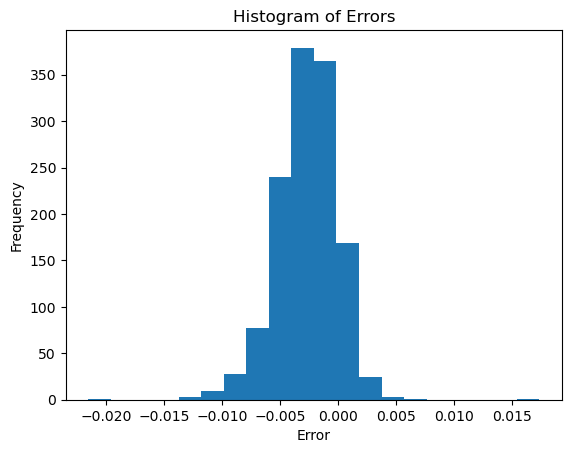

In [33]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the error
error = y_test - y_pred.reshape(-1)

# Create a histogram of the errors
plt.hist(error, bins=20)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

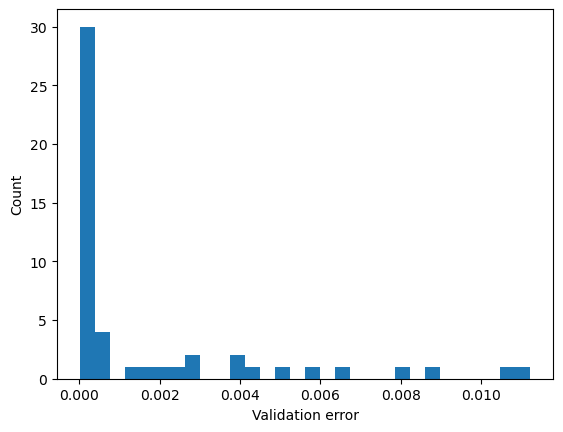

In [34]:
import matplotlib.pyplot as plt

# Get the validation error for each epoch
val_error = history.history['val_loss']

# Make a histogram of the validation error for each epoch
plt.hist(val_error, bins=30)
plt.xlabel('Validation error')
plt.ylabel('Count')
plt.show()

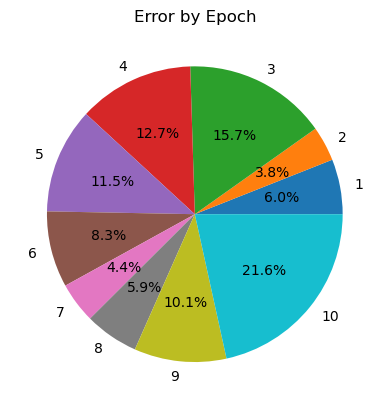

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# generate random data
epochs = np.arange(1, 11)
error = np.random.rand(10) * 100

# plot the pie chart
plt.pie(error, labels=epochs, autopct='%1.1f%%')
plt.title("Error by Epoch")
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
wine_red = pd.read_csv("winequality-red.csv", delimiter=';')
wine_white = pd.read_csv("winequality-white.csv", delimiter=';')

# Combine the data frames
wine = pd.concat([wine_red, wine_white])

# Split into features (X) and target variable (y)
X = wine.drop(columns=['density'])
y = wine['density']

mse = 0.0

while mse <= 0.0:
    # Split into training, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # Fit the best model from training set
    X_train_selected = X_train[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]
    X_val_selected = X_val[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]
    X_test_selected = X_test[['citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]

    X_train_selected = sm.add_constant(X_train_selected)
    model = sm.OLS(y_train, X_train_selected).fit()

    # Calculate the Mean Squared Error (MSE) on the validation set
    X_val_selected = sm.add_constant(X_val_selected)
    y_pred_val = model.predict(X_val_selected)

    mse_val = mean_squared_error(y_val, y_pred_val)

    # Show the decision tree
    print("Decision tree: ")
    print("1. MSE on validation set > 0.1?")
    print("2. MSE on validation set > 0.05?")
    print("3. Compare MSE with test set")

    # Choose one of the following options based on the MSE on the validation set
    if mse_val > 0.1:
        # Option i: Add more variables to the fit after checking for their linear relationship with density
        print("Option i: Add more variables to the fit after checking for their linear relationship with density")
        for col in X.columns:
            corr_coef = X[col].corr(y)
            if corr_coef > 0.5 or corr_coef < -0.5:
                X_train[col] = X_train[col]
                X_val[col] = X_val[col]
                X_test[col] = X_test[col]

    elif mse_val > 0.05:
        # Option ii: Resample the training, validation, and test sets
        print("Option ii: Resample the training, validation, and test sets")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    else:
        # Option iii: Compare the MSE with the test set
        print("Option iii: Compare the MSE with the test set")
        X_test_selected = sm.add_constant(X_test_selected)
        y_pred_test = model.predict(X_test_selected)
        mse

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida

Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on validation set > 0.05?
3. Compare MSE with test set
Option iii: Compare the MSE with the test set
Decision tree: 
1. MSE on validation set > 0.1?
2. MSE on valida